[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]
coefficient of determination: 0.715875613747954
intercept: 5.633333333333329
slope: [0.54]
predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


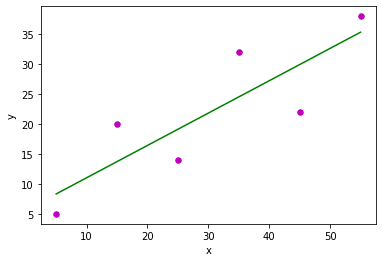

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#պետք է կանչեք .reshape() x-ի համար, քանի որ այս զանգվածը պետք է լինի երկչափ,
#այն պետք է ունենա մեկ սյունակ և այնքան տող, որքան անհրաժեշտ է:
#Դա իրականացվում է .reshape()-ի արգումենտը (-1, 1):
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)
model = LinearRegression()

model.fit(x, y)

#.fit()-ով հաշվում եք կշիռների 𝑏₀ և 𝑏₁ օպտիմալ արժեքները՝ որպես արգումենտ օգտագործելով առկա մուտքն ու ելքը՝ x և y:
#.fit()-ը համապատասխանում է մոդելին: Այն վերադարձնում է ինքն իրեն, որն ինքնին փոփոխական մոդելն է:
#կարող եք փոխարինել վերջին երկու պնդումները հետևյալով.

model = LinearRegression().fit(x, y)

#r2 ցույց է տալիս համապատասխանությունը 
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

#𝑏₀ գործակից
print(f"intercept: {model.intercept_}")

#𝑏₁ գործակից 
print(f"slope: {model.coef_}")

#𝑏₀-ի արժեքը մոտավորապես 5,63 է: Սա ցույց է տալիս, որ մոդելը կանխատեսում է 5.63 պատասխանը, երբ 𝑥-ը զրո է:
#𝑏₁ = 0,54 արժեքը նշանակում է, որ կանխատեսված պատասխանը բարձրանում է 0,54-ով, երբ 𝑥-ն ավելանում է մեկով:

#Կանխատեսված պատասխանը ստանալու համար օգտագործեք .predict():
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

#համարժեք կոդ
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

plt.scatter(x, y, color = "m", marker = "o", s = 30)

# ռեգրեսիայի գիծ
plt.plot(x, y_pred, color = "g")

# պիտակներ
plt.xlabel('x')
plt.ylabel('y')

plt.show()

coefficient of determination: 0.8514060685001755
intercept: 8.17149568252006
slope: [5.73093866]
predicted response:
[ 352.02781531  352.02781531  352.02781531  266.0637354   266.0637354
  352.02781531  352.02781531  266.0637354   180.0996555   352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  352.02781531  352.02781531  352.02781531  266.0637354   352.02781531
  266.0637354   352.02781531  266.0637354   352.02781531  352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  266.0637354
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  352.02781531  352.02781531  266.0637354   266.0637354   352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  266.0637354   266.0637354   352.02781531  352.02781531  466.64658852
  352.02781531  352.02781531  180.0996555   352.02781531  352.02781531
  266.0637354   122.79026889  266.0637354  1211.66861438  925.12168136
  925.12168136  266.0637354   122

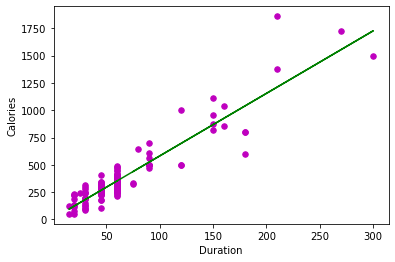

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df=pd.read_csv('data.csv')

df=df.dropna()

x=np.array(df['Duration']).reshape((-1, 1))    
y=np.array(df['Calories'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

#𝑏₀ գործակից
print(f"intercept: {model.intercept_}")

#𝑏₁ գործակից 
print(f"slope: {model.coef_}")


#Կանխատեսված պատասխանը ստանալու համար օգտագործեք .predict():
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

#համարժեք կոդ
y_pred = model.intercept_ + model.coef_ * x 
print(f"predicted response:\n{y_pred}")

plt.scatter(x, y, color = "m", marker = "o", s = 30)

# ռեգրեսիայի գիծ
plt.plot(x, y_pred, color = "g")

# պիտակներ
plt.xlabel('Duration')
plt.ylabel('Calories')

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


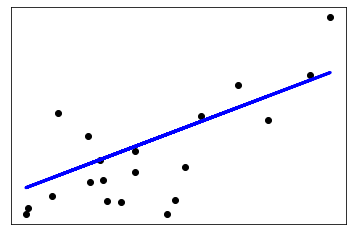

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Բեռնել շաքարախտի տվյալների բազան
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Օգտագործեք միայն մեկ հատկանիշ
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Տվյալները բաժանեք ուսուցման/փորձարկման խմբերի
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Թիրախները բաժանեք ուսուցման/փորձարկման հավաքածուների
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Ստեղծեք գծային ռեգրեսիայի օբյեկտ
regr = linear_model.LinearRegression()

# Վարժեցրեք մոդելը, օգտագործելով ուսուցման հավաքածուները
regr.fit(diabetes_X_train, diabetes_y_train)

# Կատարեք կանխատեսումներ՝ օգտագործելով թեստավորման հավաքածուն
diabetes_y_pred = regr.predict(diabetes_X_test)

# գործակից
print("Coefficients: \n", regr.coef_)

# Միջին քառակուսային սխալ
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# r2 ցույց է տալիս համապատասխանությունը
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()